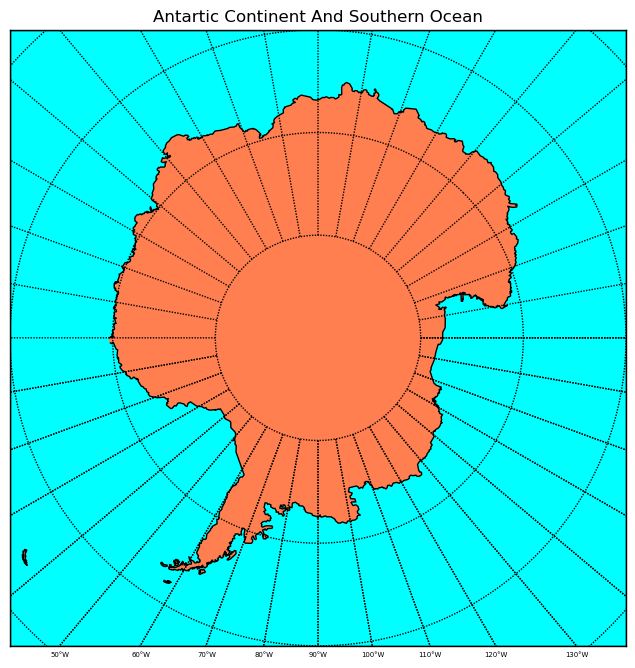

In [139]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.figure(figsize=(10, 8))
m = Basemap(projection='spaeqd',boundinglat=-60,lon_0=270,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
## Draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,10.))
m.drawmeridians(np.arange(-180.,181.,10.))
m.drawmapboundary(fill_color='aqua') 
parallels = np.arange(0.,90,10.)
meridians = np.arange(180.,360.,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=5)
ax = plt.gca()
#plt.xlabel(draw_labels=True)
plt.title("Antartic Continent And Southern Ocean")
plt.show()

In [128]:
import cartopy.crs as ccrs
import cartopy

[Location(Walvis Bay, Erongo Region, 13013, Namibia, (-22.9557607, 14.5071125, 0.0)), Location(Cape Town, City of Cape Town, Western Cape, 8001, South Africa, (-33.928992, 18.417396, 0.0)), Location(Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Southeast Region, Brazil, (-22.9110137, -43.2093727, 0.0)), Location(Montevideo, Uruguay, (-34.9058916, -56.1913095, 0.0))]


Text(0.5, 1.0, 'South Atlantic (20S - 50S)')

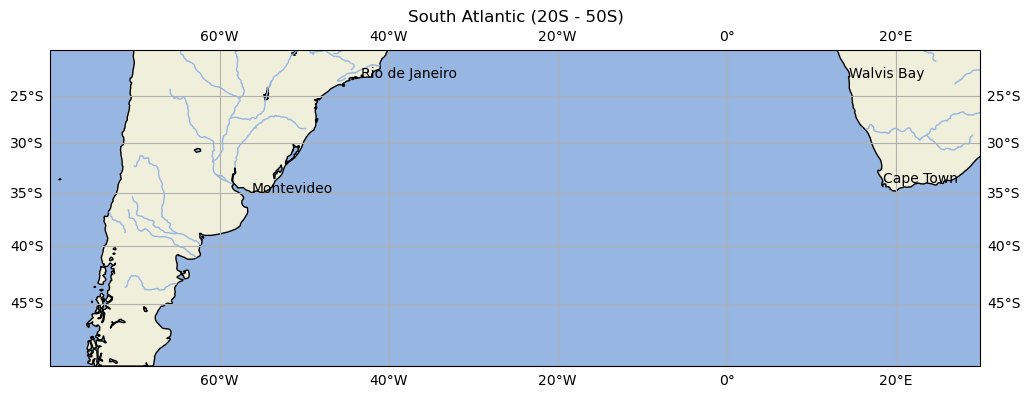

In [129]:
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
extent = [-80, 30, -80, -20]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
geolocator = Nominatim(user_agent='educational')
place = ['Walvis Bay','Cape Town','Rio de Janeiro','Montevideo']
address = []
for p in place:
    loc = geolocator.geocode(p,language="en")
    address.append(loc)
print(address)
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.Mercator(central_lon, central_lat))
ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines(draw_labels=True)
for p in range(len(place)):
    ax.text(address[p].longitude,address[p].latitude,place[p],transform=ccrs.Geodetic())
plt.title("South Atlantic (20S - 50S)")


In [132]:
import geopandas as gpd
import matplotlib.pyplot as plt
shapefile1= gpd.read_file(r'C:\Users\MTMLAM001\Documents\GitHub\AOS-SCDM\P3\gshhg-shp-2.3.7\GSHHS_shp\h\GSHHS_h_L1.shp')
shapefile1.head()

,id,level,source,parent_id,sibling_id,area,geometry
0,0-E,1,WVS,-1,0,5.065405e+07,"POLYGON ((180.00000 68.99378, 180.00000 65.034..."
1,0-W,1,WVS,-1,0,5.065405e+07,"POLYGON ((-180.00000 68.99378, -179.99844 68.9..."
2,1,1,WVS,-1,1,2.922097e+07,"POLYGON ((32.28458 31.22667, 32.28450 31.23281..."
3,2,1,WVS,-1,2,2.015474e+07,"POLYGON ((-79.94869 9.31397, -79.92538 9.31240..."
4,3,1,WVS,-1,3,1.753416e+07,"POLYGON ((-73.36172 -53.00042, -73.36261 -53.0..."


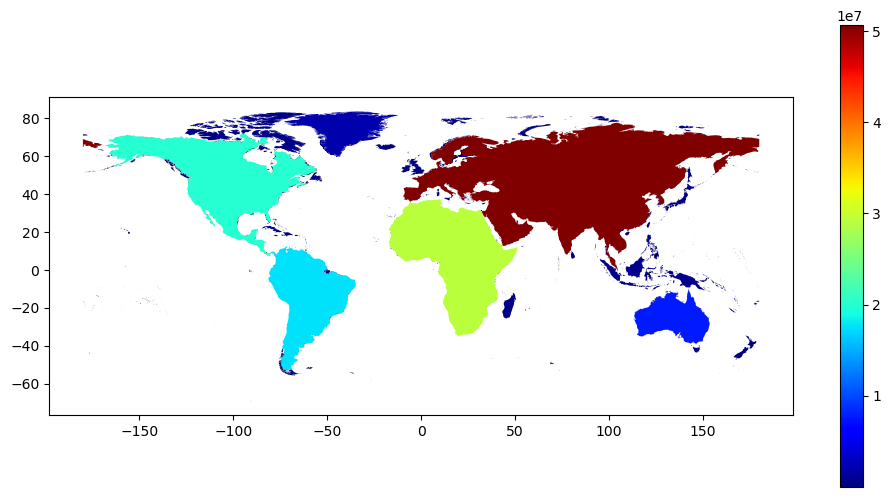

In [131]:
import geopandas as gpd
import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(12,6))
shapefile1.plot(ax=ax, column="area", cmap='jet', legend=True)
#plt.ylabel('Latitude')
plt.show()

In [121]:
ccrs.PlateCarree?
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      c:\users\mtmlam001\.conda\envs\aos\lib\site-packages\cartopy\mpl\geoaxes.py
Type:      method

In [150]:
import cartopy.feature as cfeature

In [ ]:
#Ploting using the settings: ‘coarse’, ‘intermediate’, and ‘full’ Resolutions Using the Shapefile1 from GSHHS
# All the Plots I will use MERCATOR Projection. Mercator Projection has very large distortion at high latitudes.
#The Plot output looks weel distribuited on the frame.

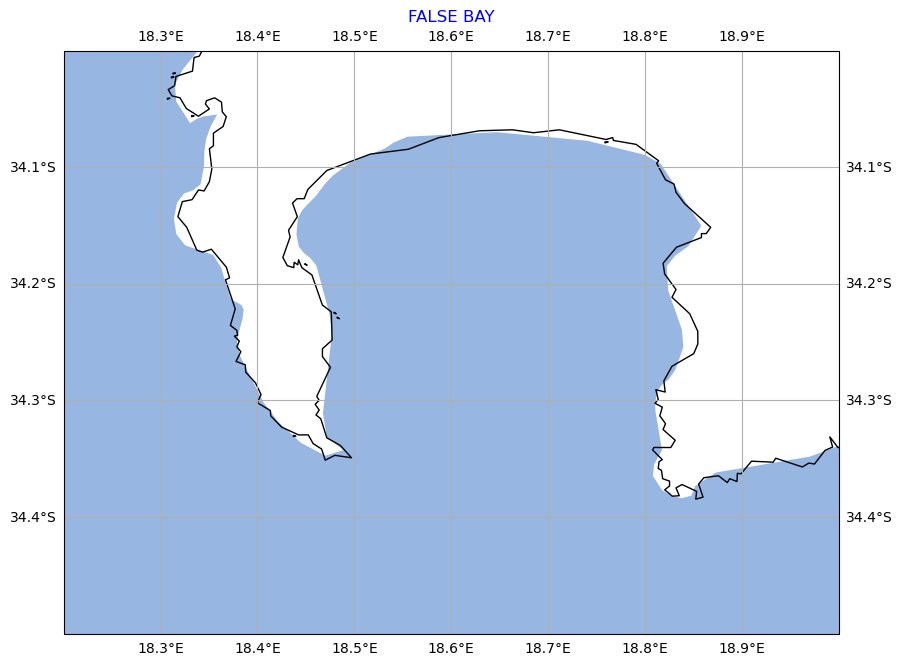

In [146]:
# Intermediate Resolution
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
cl_intermediate = cfeature.GSHHSFeature(scale='h')
extent = [18.2, 19, -34, -34.5]
geolocator = Nominatim(user_agent='educational')
place = ['False Bay']
address = []
for p in place:
    loc = geolocator.geocode(p,language="en")
    address.append(loc)
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mercator())
#shapefile1.plot(ax=ax, column="area", cmap='jet', legend=True)
ax.set_extent(extent)
ax.add_feature(cl_intermediate)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.OCEAN)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("FALSE BAY", color='blue')
plt.show(ax)

In [57]:
# Ploting Intermediate Resoltion 

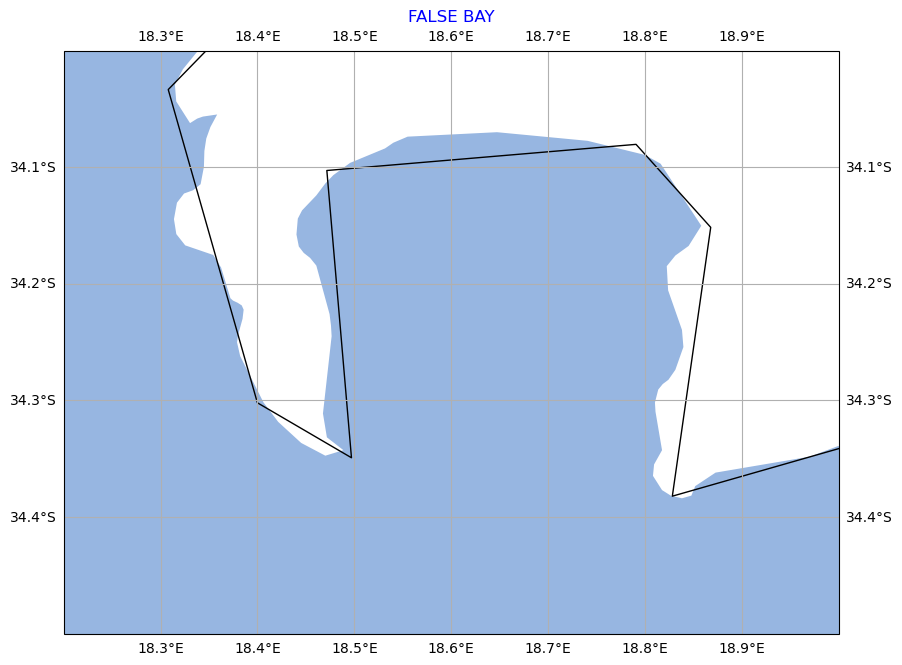

In [112]:
# Coarse Resolution
cl_coarse = cfeature.GSHHSFeature(scale='l')
extent = [18.2, 19, -34, -34.5]
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.Mercator())
#shapefile1.plot(ax=ax, column="area", cmap='jet', legend=True)
ax.set_extent(extent)
ax.add_feature(cl_coarse)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.OCEAN)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_ylabel("Latitude")
plt.title("FALSE BAY", color='blue')
plt.show(ax)

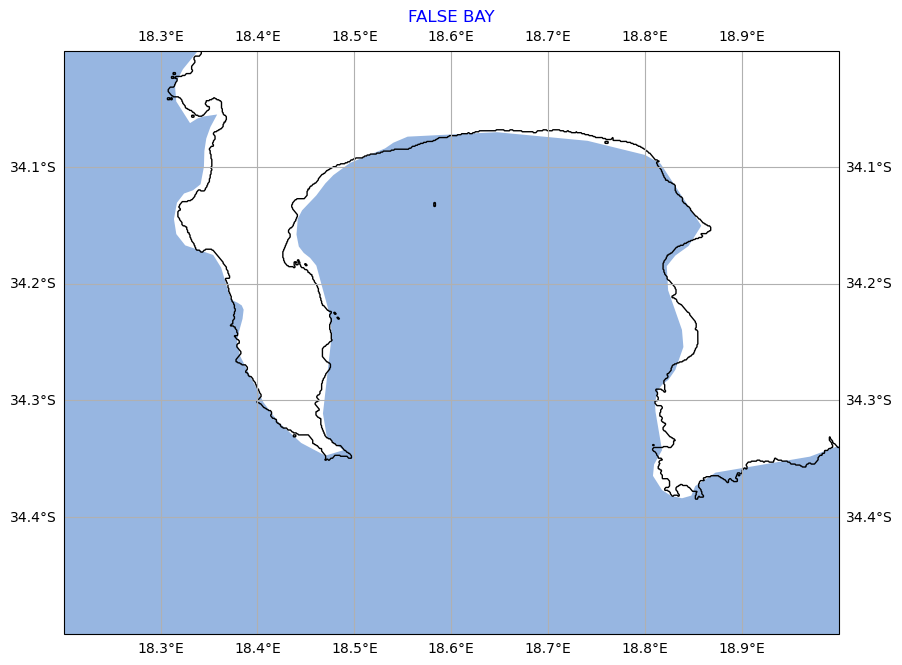

In [113]:
# Full Resolution
cl_full = cfeature.GSHHSFeature(scale='f')
extent = [18.2, 19, -34, -34.5]
plt.figure(figsize=(10, 8))
axes=shapefile1
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent(extent)
ax.add_feature(cl_full)
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.OCEAN)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("FALSE BAY", color='blue')
plt.show(ax)